# Introduction to Neural Networks with Keras

# Setup

In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from tensorflow import keras
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import os

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("ggplot")
warnings.filterwarnings(action="ignore")
os.chdir('output')

# Classification MLP

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

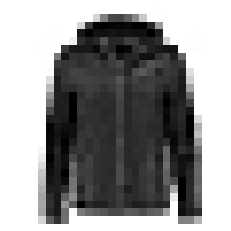

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

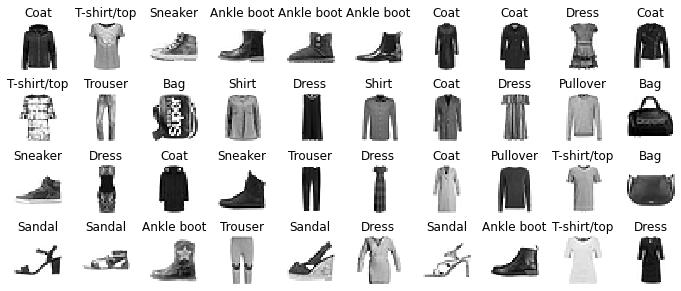

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [40]:
keras.backend.clear_session()

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.layers

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


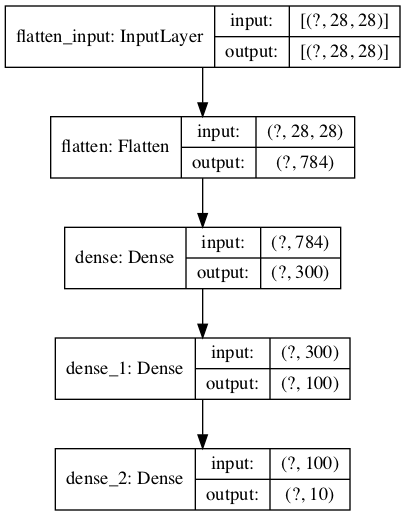

In [44]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [45]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [46]:
weights, biases = hidden1.get_weights()

In [47]:
weights

array([[ 0.05635142,  0.0084236 , -0.05684652, ...,  0.03257589,
        -0.0464515 ,  0.00419041],
       [ 0.0135648 , -0.00261137, -0.02726132, ...,  0.02489377,
        -0.04565743, -0.07105474],
       [-0.02605936, -0.00893371, -0.00956664, ...,  0.00423814,
        -0.04209902, -0.04677158],
       ...,
       [ 0.00874295,  0.03373568, -0.07112255, ...,  0.03877953,
        -0.04676899, -0.06850648],
       [-0.00194161,  0.05573376, -0.04535305, ...,  0.02450331,
        -0.05434909, -0.04098695],
       [-0.05296085,  0.0138928 ,  0.05946814, ..., -0.05468564,
         0.06951469,  0.04704306]], dtype=float32)

In [48]:
weights.shape

(784, 300)

In [49]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
biases.shape

(300,)

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [52]:
history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7117 - accuracy: 0.7640 - val_loss: 0.5009 - val_accuracy: 0.8374
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4903 - accuracy: 0.8284 - val_loss: 0.4384 - val_accuracy: 0.8556
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4454 - accuracy: 0.8437 - val_loss: 0.4175 - val_accuracy: 0.8600
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4173 - accuracy: 0.8541 - val_loss: 0.3986 - val_accuracy: 0.8668
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3974 - accuracy: 0.8609 - val_loss: 0.3947 - val_accuracy: 0.8626


In [53]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

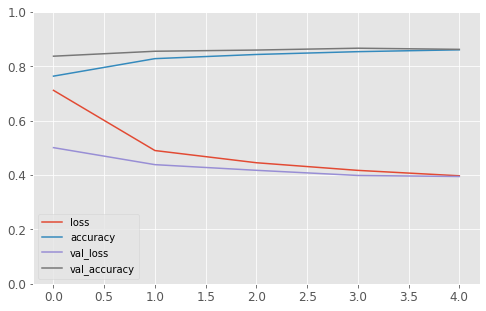

In [55]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 798us/step - loss: 0.4353 - accuracy: 0.8466


[0.43534618616104126, 0.8465999960899353]

In [57]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.13, 0.  , 0.82],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [58]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

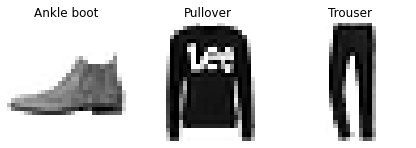

In [59]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

In [60]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/5
363/363 [==============================] - 0s 937us/step - loss: 1.9677 - val_loss: 0.8609
Epoch 2/5
363/363 [==============================] - 0s 792us/step - loss: 0.7398 - val_loss: 0.6472
Epoch 3/5
363/363 [==============================] - 0s 784us/step - loss: 0.6460 - val_loss: 0.6012
Epoch 4/5
363/363 [==============================] - 0s 799us/step - loss: 0.6043 - val_loss: 0.5709
Epoch 5/5
162/162 [==============================] - 0s 565us/step - loss: 0.5486


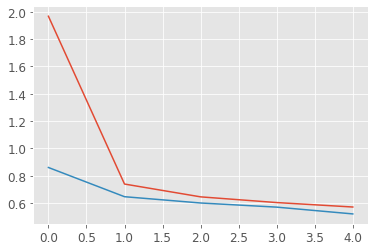

In [62]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

In [63]:
y_pred

array([[0.72965586],
       [1.3349841 ],
       [2.7687416 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [67]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [68]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_9[0][0]              

In [69]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 1.8965 - val_loss: 1.2487
Epoch 2/5
363/363 [==============================] - 0s 830us/step - loss: 0.7022 - val_loss: 0.6220
Epoch 3/5
363/363 [==============================] - 0s 830us/step - loss: 0.6187 - val_loss: 0.6472
Epoch 4/5
363/363 [==============================] - 0s 838us/step - loss: 0.5812 - val_loss: 0.5378
Epoch 5/5
162/162 [==============================] - 0s 532us/step - loss: 0.5291


What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [70]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=5,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 [==============================] - 0s 990us/step - loss: 0.4100 - val_loss: 0.3882
Epoch 2/5
363/363 [==============================] - 0s 848us/step - loss: 0.4080 - val_loss: 0.3933
Epoch 3/5
363/363 [==============================] - 0s 849us/step - loss: 0.4067 - val_loss: 0.3801
Epoch 4/5
363/363 [==============================] - 0s 864us/step - loss: 0.4051 - val_loss: 0.3865
Epoch 5/5
162/162 [==============================] - 0s 573us/step - loss: 0.3989


Adding an auxiliary output for regularization:

In [73]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [74]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [75]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=5,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 2.0787 - main_output_loss: 1.7933 - aux_output_loss: 4.6473 - val_loss: 2.0281 - val_main_output_loss: 1.6184 - val_aux_output_loss: 5.7156
Epoch 2/5
363/363 [==============================] - 0s 975us/step - loss: 0.9802 - main_output_loss: 0.7489 - aux_output_loss: 3.0616 - val_loss: 1.1150 - val_main_output_loss: 0.7426 - val_aux_output_loss: 4.4669
Epoch 3/5
363/363 [==============================] - 0s 985us/step - loss: 0.8262 - main_output_loss: 0.6684 - aux_output_loss: 2.2459 - val_loss: 0.9591 - val_main_output_loss: 0.6224 - val_aux_output_loss: 3.9891
Epoch 4/5
363/363 [==============================] - 0s 966us/step - loss: 0.7495 - main_output_loss: 0.6270 - aux_output_loss: 1.8512 - val_loss: 0.8976 - val_main_output_loss: 0.5856 - val_aux_output_loss: 3.7055
Epoch 5/5
363/363 [==============================] - 0s 980us/step - loss: 0.7029 - main_output_loss: 0.5973 - aux_output_loss: 1.6532 - val_l

In [76]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 625us/step - loss: 0.6777 - main_output_loss: 0.5781 - aux_output_loss: 1.5743


# Subclassing API

In [77]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [78]:
model = WideAndDeepModel(30, activation="relu")
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=5,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 2.6932 - output_1_loss: 2.4234 - output_2_loss: 5.1216 - val_loss: 1.2141 - val_output_1_loss: 0.8981 - val_output_2_loss: 4.0579
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 1.0351 - output_1_loss: 0.7722 - output_2_loss: 3.4016 - val_loss: 0.9142 - val_output_1_loss: 0.7100 - val_output_2_loss: 2.7522
Epoch 3/5
363/363 [==============================] - 0s 987us/step - loss: 0.8398 - output_1_loss: 0.6615 - output_2_loss: 2.4441 - val_loss: 0.8203 - val_output_1_loss: 0.6642 - val_output_2_loss: 2.2256
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.7497 - output_1_loss: 0.6176 - output_2_loss: 1.9383 - val_loss: 0.7460 - val_output_1_loss: 0.6094 - val_output_2_loss: 1.9752
Epoch 5/5
162/162 [==============================] - 0s 663us/step - loss: 0.6636 - output_1_loss: 0.5626 - output_2_loss: 1.5731


# Saving and Restoring

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/5
363/363 [==============================] - 0s 934us/step - loss: 2.1451 - val_loss: 1.0242
Epoch 2/5
363/363 [==============================] - 0s 834us/step - loss: 0.7330 - val_loss: 0.8066
Epoch 3/5
363/363 [==============================] - 0s 831us/step - loss: 0.6112 - val_loss: 0.5614
Epoch 4/5
363/363 [==============================] - 0s 830us/step - loss: 0.5557 - val_loss: 0.5127
Epoch 5/5
162/162 [==============================] - 0s 537us/step - loss: 0.4845


In [81]:
model.save("my_keras_model.h5")

In [82]:
model = keras.models.load_model("my_keras_model.h5")

In [83]:
model.predict(X_new)

array([[0.80617946],
       [1.4403341 ],
       [2.96695   ]], dtype=float32)

When using model subclassing, you can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

In [84]:
model.save_weights("my_keras_weights.ckpt")

In [85]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [86]:
keras.backend.clear_session()

In [87]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [88]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 962us/step - loss: 1.6455 - val_loss: 0.9495
Epoch 2/10
363/363 [==============================] - 0s 843us/step - loss: 0.8043 - val_loss: 0.7147
Epoch 3/10
363/363 [==============================] - 0s 907us/step - loss: 0.7097 - val_loss: 0.9031
Epoch 4/10
363/363 [==============================] - 0s 835us/step - loss: 0.6523 - val_loss: 0.6120
Epoch 5/10
363/363 [==============================] - 0s 836us/step - loss: 0.5993 - val_loss: 0.5463
Epoch 6/10
363/363 [==============================] - 0s 835us/step - loss: 0.5559 - val_loss: 0.5242
Epoch 7/10
363/363 [==============================] - 0s 839us/step - loss: 0.5217 - val_loss: 0.4806
Epoch 8/10
363/363 [==============================] - 0s 844us/step - loss: 0.4949 - val_loss: 0.4626
Epoch 9/10
363/363 [==============================] - 0s 833us/step - loss: 0.4751 - val_loss: 0.4511
Epoch 10/10
162/162 [==============================] - 0s 549us/step - loss: 0.440

In [89]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=5e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 945us/step - loss: 0.4406 - val_loss: 1.7522
Epoch 2/100
363/363 [==============================] - 0s 806us/step - loss: 0.4251 - val_loss: 3.7814
Epoch 3/100
363/363 [==============================] - 0s 816us/step - loss: 0.4347 - val_loss: 5.8548
Epoch 4/100
363/363 [==============================] - 0s 822us/step - loss: 0.4181 - val_loss: 3.5585
Epoch 5/100
363/363 [==============================] - 0s 826us/step - loss: 0.4037 - val_loss: 0.6715
Epoch 6/100
363/363 [==============================] - 0s 807us/step - loss: 0.3835 - val_loss: 0.4691
Epoch 7/100
363/363 [==============================] - 0s 841us/step - loss: 0.3765 - val_loss: 0.4007
Epoch 8/100
363/363 [==============================] - 0s 849us/step - loss: 0.3730 - val_loss: 0.3550
Epoch 9/100
363/363 [==============================] - 0s 818us/step - loss: 0.3691 - val_loss: 0.3918
Epoch 10/100
363/363 [==============================] - 0s 813us/step - l

In [90]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [91]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

339/363 [===========================>..] - ETA: 0s - loss: 0.3450
val/train: 1.12
363/363 [==============================] - 0s 823us/step - loss: 0.3447 - val_loss: 0.3863


# Hyperparameter Tuning

In [92]:
#keras.backend.clear_session()

In [93]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [94]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [95]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/100
363/363 [==============================] - 0s 912us/step - loss: 1.3007 - val_loss: 19.3225
Epoch 2/100
363/363 [==============================] - 0s 787us/step - loss: 0.7152 - val_loss: 1.2149
Epoch 3/100
363/363 [==============================] - 0s 779us/step - loss: 0.5282 - val_loss: 0.4680
Epoch 4/100
363/363 [==============================] - 0s 784us/step - loss: 0.4798 - val_loss: 0.4278
Epoch 5/100
363/363 [==============================] - 0s 786us/step - loss: 0.4574 - val_loss: 0.4110
Epoch 6/100
363/363 [==============================] - 0s 783us/step - loss: 0.4449 - val_loss: 0.4017
Epoch 7/100
363/363 [==============================] - 0s 780us/step - loss: 0.4379 - val_loss: 0.4054
Epoch 8/100
363/363 [==============================] - 0s 785us/step - loss: 0.4322 - val_loss: 0.3931
Epoch 9/100
363/363 [==============================] - 0s 778us/step - loss: 0.4269 - val_loss: 0.3897
Epoch 10/100
363/363 [==============================] - 0s 800us/step - 

In [96]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 547us/step - loss: 0.4101


In [97]:
y_pred = keras_reg.predict(X_new)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon.

In [98]:
#param_distribs = {
#    "n_hidden": [0, 1, 2, 3],
#    "n_neurons": np.arange(1, 100),
#    "learning_rate": reciprocal(3e-4, 3e-2),
#}

#rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3, verbose=2)
#rnd_search_cv.fit(X_train, y_train, epochs=50,
#                  validation_data=(X_valid, y_valid),
#                  callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)#

In [99]:
#rnd_search_cv.best_params_

In [100]:
#rnd_search_cv.best_score_

In [101]:
#rnd_search_cv.best_estimator_

In [102]:
#rnd_search_cv.score(X_test, y_test)

In [103]:
#model = rnd_search_cv.best_estimator_.model
#model

In [104]:
#model.evaluate(X_test, y_test)